<a href="https://colab.research.google.com/github/nir-fogel/CIFAR10-dataset-ML-classification/blob/main/CIFAR10_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.metrics import categorical_crossentropy


In [23]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [24]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [25]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)


In [26]:
x_train_scaled = x_train.reshape(x_train.shape[0], -1)
x_test_scaled = x_test.reshape(x_test.shape[0], -1)

train_labels = np.array(y_train)
train_samples = np.array(x_train_scaled / 255)


In [27]:
test_labels = np.array(y_test)
test_samples = np.array(x_test_scaled / 255)

In [28]:
print()

In [29]:
model = Sequential([
    Dense(units=128, input_shape=(3072,), activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=10, activation='softmax')
])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               393344    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 411146 (1.57 MB)
Trainable params: 411146 (1.57 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model.compile(optimizer=Adam(learning_rate=0.0000004),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

In [32]:
history = model.fit(x=train_samples,
          y=train_labels, validation_split=0.1,
          batch_size=128,
          epochs=1000,
          shuffle=True,
          verbose=2
)

Epoch 1/1000
352/352 - 6s - loss: 2.3906 - accuracy: 0.1035 - val_loss: 2.3474 - val_accuracy: 0.1124 - 6s/epoch - 18ms/step
Epoch 2/1000
352/352 - 4s - loss: 2.3300 - accuracy: 0.1150 - val_loss: 2.3053 - val_accuracy: 0.1262 - 4s/epoch - 12ms/step
Epoch 3/1000
352/352 - 4s - loss: 2.2950 - accuracy: 0.1358 - val_loss: 2.2802 - val_accuracy: 0.1552 - 4s/epoch - 11ms/step
Epoch 4/1000
352/352 - 5s - loss: 2.2731 - accuracy: 0.1606 - val_loss: 2.2635 - val_accuracy: 0.1764 - 5s/epoch - 13ms/step
Epoch 5/1000
352/352 - 4s - loss: 2.2576 - accuracy: 0.1802 - val_loss: 2.2505 - val_accuracy: 0.1878 - 4s/epoch - 12ms/step
Epoch 6/1000
352/352 - 4s - loss: 2.2450 - accuracy: 0.1908 - val_loss: 2.2391 - val_accuracy: 0.1990 - 4s/epoch - 11ms/step
Epoch 7/1000
352/352 - 5s - loss: 2.2338 - accuracy: 0.1993 - val_loss: 2.2288 - val_accuracy: 0.2054 - 5s/epoch - 14ms/step
Epoch 8/1000
352/352 - 4s - loss: 2.2235 - accuracy: 0.2062 - val_loss: 2.2190 - val_accuracy: 0.2096 - 4s/epoch - 11ms/step


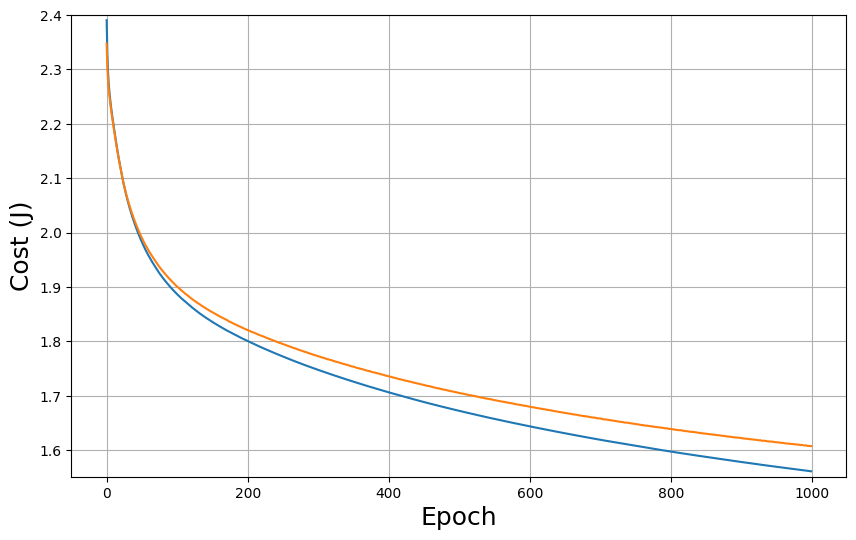

In [33]:
plt.figure(figsize = (10,6))
plt.ylim(min(history.history['loss']) - 0.01 , max(history.history['loss']) + 0.01)
plt.xlabel('Epoch' , fontsize = 18)
plt.ylabel('Cost (J)' , fontsize = 18)
plt.grid(True)
plt.plot(history.history['loss'], label='Cost')
plt.plot(history.history['val_loss'], label='loss_val')

In [34]:
predictions = model.predict(x=test_samples, batch_size=128, verbose=0)
rounded_predictions = np.argmax(predictions, axis=-1)

In [35]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [36]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[519  37  63  16  29  14  26  49 195  52]
 [ 56 506  21  36  23  28  36  36  92 166]
 [105  30 281  78 148  81 142  71  43  21]
 [ 37  45  82 304  56 194 110  64  39  69]
 [ 65  23 147  50 370  56 136  91  36  26]
 [ 27  28  88 172  80 344  97  92  45  27]
 [ 15  30  78  83 106  75 528  40  19  26]
 [ 56  37  53  61  91  73  46 486  31  66]
 [107  80  15  21  19  27  11  18 623  79]
 [ 49 164  11  35  13  29  38  56  87 518]]


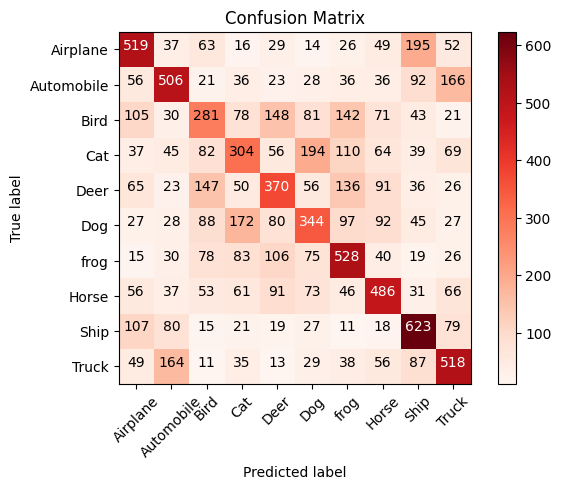

In [37]:
cm_plot_labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'frog', 'Horse', 'Ship', 'Truck']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')